# <center>Aprendizaje Automático </center>                             
## <center><b>  Árboles y random forest para regresión y clasificación </b></center>
<center><b> Equipo: </b></center>  
<center><b> Alicia Amores Sánchez </b></center> 
<center><b> Eduardo Reyero Ibáñez </b></center>
<center><b> Gerard Vazquez Rubio </b></center>
<center><b> Hector Lopez Almazan </b></center>
<center><b> Javier Fernandez Lasso </b></center>

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import missingno
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, r2_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

Leer los datos los datos del USA Housing Dataset:

In [2]:
# Importar dataset
housing_df = pd.read_csv('housing_train.csv')
housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# 1. Análisis descriptivo de los datos:

<b>Variables numéricas:</b>

In [3]:
# Análisis descriptivo de los datos
# Variables numéricas
# Obtener num de elementos, media, desv típica, max, min y cuartiles
stats_df = housing_df.describe()
# Obtener y añadir la mediana
median = pd.DataFrame(housing_df.median())
median = median.transpose()
median.rename(index = {0:'median'},inplace = True)
stats_df = stats_df.append(median).transpose() # Hay q igualarlo porq append() devuelve nuevo df
stats_df

,count,mean,std,min,25%,50%,75%,max,median
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0,730.5
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0,50.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0,69.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0,9478.5
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0,6.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0,5.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0,1973.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0,1994.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0,0.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0,383.5


<b> Variables categóricas</b>

In [4]:
#De las variables categóricas, listar las diferentes categorías 
#y hallar la frecuencia de cada una de ellas. 
housing_df.describe(include='object').T

,count,unique,top,freq
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
Alley,91,2,Grvl,50
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260


A continuación se va a mostrar la frecuencia para cada valor dentro de los atributos categóricos:

In [5]:
for column in housing_df.select_dtypes(include='object').columns:
    print(housing_df[column].value_counts())
    print('-'*20)

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
--------------------
Pave    1454
Grvl       6
Name: Street, dtype: int64
--------------------
Grvl    50
Pave    41
Name: Alley, dtype: int64
--------------------
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
--------------------
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
--------------------
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
--------------------
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
--------------------
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
--------------------
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR  

<b> Matriz de correlaciones con las columnas numéricas </b>

In [6]:
#Crear la matriz de correlaciones con las columnas numéricas
var_num = housing_df.select_dtypes(include = ['int64','float64']).reset_index(drop = True)
corr_mat = var_num.corr()
corr_mat

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


In [7]:
#Encontrar las correlaciones más altas,
print('\033[1m'+'Listado de las variables con mayor influencia en el precio de venta junto a su coeficiente de correlación:'+'\033[0m')
important_var_list = []
for i in range(0,len(corr_mat)):
    if corr_mat['SalePrice'][i] > 0.5:
        print('{} {}'.format(corr_mat.index[i],corr_mat.loc[corr_mat.index[i],'SalePrice']))
        important_var_list.append(corr_mat.index[i])

Listado de las variables con mayor influencia en el precio de venta junto a su coeficiente de correlación:
OverallQual 0.7909816005838047
YearBuilt 0.5228973328794967
YearRemodAdd 0.5071009671113867
TotalBsmtSF 0.6135805515591944
1stFlrSF 0.6058521846919166
GrLivArea 0.7086244776126511
FullBath 0.5606637627484452
TotRmsAbvGrd 0.5337231555820238
GarageCars 0.640409197258349
GarageArea 0.6234314389183598
SalePrice 1.0


Se puede observan que existen bastantes variables que tienen una fuerte correlación positiva con la variable a predecir. Destacar que solamente OverallQual supera el 0.75 de correlación con la variable SalePrice. Entre el resto de variables, se puede destacar:
- **OverallQual (0.789538)**: Calidad general del material y del acabado
- **GrLivArea (0.704105)**: Superficie habitable por encima del nivel del suelo en pies cuadrados.
- **GarageCars (0.630105)**: Tamaño del garaje en capacidad de coches.
- **GarageArea (0.617357)**: Tamaño del garaje en pies cuadrados.
- **1stFlrSF (0.600659)**: Área en pies cuadrados de la primera planta.
- **TotalBsmtSF(0.599015)**: Pies cuadrados totales del sótano. 

# 2. Tratamiento de missing.

Identificamos las variables que faltan en cada columna:

In [8]:
# Lista con los missing de cada columna
missing = housing_df.isna().sum()
# Creamos dataframe con columnas y missing values
missing_df = pd.DataFrame([housing_df.columns,missing]).transpose()
# Nos quedamos solo con  las columnas que tengan missing
for index in missing_df.index:
    if missing_df.iloc[index,1] > 0:
        print('Columna: {}, N of NaN: {}, Index in Dataframe: {}'.format(missing_df.iloc[index,0],missing_df.iloc[index,1],index))


Columna: LotFrontage, N of NaN: 259, Index in Dataframe: 3
Columna: Alley, N of NaN: 1369, Index in Dataframe: 6
Columna: MasVnrType, N of NaN: 8, Index in Dataframe: 25
Columna: MasVnrArea, N of NaN: 8, Index in Dataframe: 26
Columna: BsmtQual, N of NaN: 37, Index in Dataframe: 30
Columna: BsmtCond, N of NaN: 37, Index in Dataframe: 31
Columna: BsmtExposure, N of NaN: 38, Index in Dataframe: 32
Columna: BsmtFinType1, N of NaN: 37, Index in Dataframe: 33
Columna: BsmtFinType2, N of NaN: 38, Index in Dataframe: 35
Columna: Electrical, N of NaN: 1, Index in Dataframe: 42
Columna: FireplaceQu, N of NaN: 690, Index in Dataframe: 57
Columna: GarageType, N of NaN: 81, Index in Dataframe: 58
Columna: GarageYrBlt, N of NaN: 81, Index in Dataframe: 59
Columna: GarageFinish, N of NaN: 81, Index in Dataframe: 60
Columna: GarageQual, N of NaN: 81, Index in Dataframe: 63
Columna: GarageCond, N of NaN: 81, Index in Dataframe: 64
Columna: PoolQC, N of NaN: 1453, Index in Dataframe: 72
Columna: Fence,

Veremos ahora el porcentaje de missing en cada columna junto con una representación visual:

In [9]:
# Calculamos el porcentaje de missing values para cada atributo
percent_missing = housing_df.isnull().sum() * 100 / len(housing_df)
# Creamos un DataFrame con los porcentajes y el nombre de cada atributo
missing_values_df = pd.DataFrame({'percent_missing': percent_missing})
# Atributos con algun missing value
missing_values_df[missing_values_df['percent_missing'] > 0.]

,percent_missing
LotFrontage,17.739726
Alley,93.767123
MasVnrType,0.547945
MasVnrArea,0.547945
BsmtQual,2.534247
BsmtCond,2.534247
BsmtExposure,2.602740
BsmtFinType1,2.534247
BsmtFinType2,2.602740
Electrical,0.068493


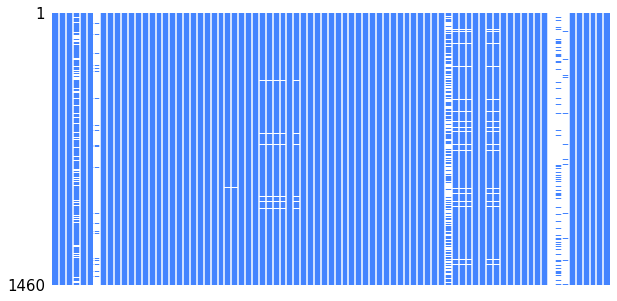

In [10]:
missingno.matrix(housing_df,sparkline=False, figsize=(10,5), fontsize=12, color=(0.27, 0.52, 1.0));

Ahora procederemos al tratamiento de las columnas con missing:

<b>Las columnas con más de un 10% de missing:</b>
<p>El dataframe tiene 1460 filas, por tanto aquellas que presenten más de un 10 % de missing seran eliminadas directamente. Esto significa que las columnas con más de 146 casos de missing serán directamente eliminadas del dataframe.Concretamente:</p> 
<p> LotFrontage</p>
<p>Alley</p>
<p>FireplaceQu</p>
<p>PoolQC</p>
<p>Fence</p>
<p>MiscFeature</p>

In [11]:
# Eliminamos las columnas con más de 10% de missing

# Cogemos las columnas que nos interesan
columns_to_drop = []
for index in missing_df.index:
    if missing_df.iloc[index,1] > 0.1*len(housing_df):
        columns_to_drop.append(missing_df.iloc[index,0])
        
# Eliminamos las columnas del dataframe original
housing_df.drop(columns_to_drop, axis = 1, inplace = True)

Comprobamos visualmente como estas columnas han desaparecido:

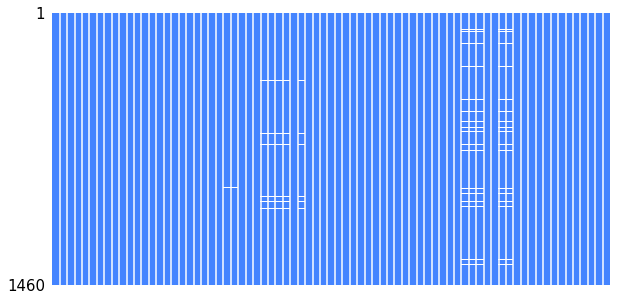

In [12]:
missingno.matrix(housing_df,sparkline=False, figsize=(10,5), fontsize=12, color=(0.27, 0.52, 1.0));

<b>Las columnas que quedan con datos NA:</b>
<p> MasVnrType, N of NaN: 8</p> 
<p> MasVnrArea, N of NaN: 8</p> 
<p> BsmtQual, N of NaN: 37</p> 
<p> BsmtCond, N of NaN: 37</p> 
<p> BsmtExposure, N of NaN: 38 </p> 
<p> BsmtFinType1, N of NaN: 37 </p> 
<p> BsmtFinType2, N of NaN: 38 </p> 
<p> Electrical, N of NaN: 1</p> 
<p> GarageType, N of NaN: 81</p> 
<p> GarageYrBlt, N of NaN: 81</p> 
<p> GarageFinish, N of NaN: 81 </p> 
<p> GarageQual, N of NaN: 81</p> 
<p> GarageCond, N of NaN: 81</p>

<b>Garaje</b>

Para las cinco columnas relacionadas con la variable garaje observamos que los datos que faltan corresponden a las mismas viviendas para las cinco columnas. En este caso se ha considerado como solución el añadir una nueva categoría de dichas variables la categoria None, la cual significará que dichas casas no tienen garaje. Justificamos esta decisión en base a que para esas 81 viviendas el precio medio obtenido ha sido de 103317€ frente a los  185479€ del resto de viviendas con garaje ya que como se ha visto anteriormente, algunas de las columnas relacionadas con el garaje están fuertemente correlacionadas con el precio

In [13]:
#Analizar las variables que tengan información sobre el garage, 
#reemplazar valores NA con una categoría adicional denominada "None"

#Las variables relacionadas con el garaje con: GarageType, GarageYrBlt, GarageFinish, GarageQual y GarageCond
housing_df['GarageType'].fillna('None',inplace = True)
housing_df['GarageYrBlt'].fillna('None',inplace = True)
housing_df['GarageFinish'].fillna('None',inplace = True)
housing_df['GarageQual'].fillna('None',inplace = True)
housing_df['GarageCond'].fillna('None',inplace = True)

<b>MasVnrType</b>

Para rellenar los valores faltantes asociados a esta columna se ha utilizado la moda de las casas vecinas:

In [14]:
#MasVnrType: tipo de revestimiento de mampostería
#Hacemos la moda de las casas vecinas e insertamos dicho valor
#Cogemos las columnas MasVnrType vacías y las llenamos con '0'
housing_df['MasVnrType'] = housing_df['MasVnrType'].fillna('0')
mvt_df = housing_df[housing_df['MasVnrType']=='0']
mvt_df.head()
# de cada una de ellas 
for i in mvt_df.index:
    #cogemos vemos su neighborhood
    barrio = (mvt_df["Neighborhood"][i])  
    #vemos las casas en el mismo neighborhood
    #y sacamos la moda del valor de MasVnrType
    if barrio == 'Gilbert':
        vecindario = housing_df[housing_df['Neighborhood']=='Gilbert']
        moda = vecindario['MasVnrType'].mode()         
    elif barrio == 'Crawfor':
        vecindario = housing_df[housing_df['Neighborhood']=='Crawford']
        moda = vecindario['MasVnrType'].mode()
    elif barrio == 'Somerst':
        vecindario = housing_df[housing_df['Neighborhood']=='Somerst']
        moda = vecindario['MasVnrType'].mode()
    elif barrio == 'SawyerW':
        vecindario = housing_df[housing_df['Neighborhood']=='SawyerW']
        moda = vecindario['MasVnrType'].mode()
    elif barrio == 'NridgHt':
        vecindario = housing_df[housing_df['Neighborhood']=='NridgHt']
        moda = vecindario['MasVnrType'].mode()
    elif barrio == 'CollgCr':
        vecindario = housing_df[housing_df['Neighborhood']=='CollgCr']
        moda = vecindario['MasVnrType'].mode()
    else:
        moda = '0'
    
    # Hay un elemento que esta vacío, por lo que en ese caso se le asigna 'None'
    if len(moda) == 0:
        moda = 'None'
    else:
        # El método mode devuelve un pandas.Series por lo que hay que obtener su elemento
        moda = moda[0]
    #sustituimos las columnas por su moda
    housing_df.MasVnrType.replace({"0": moda})

<b>MasVnrArea</b>

Seguimos con la misma estrategia que con la variable MasVnrType, pero en este caso utilizando la media al tratarse de una variable numérica:

In [15]:
#MasVnrArea: área de revestimiento de mampostería en pies cuadrados
#Igual que MasVnrType, pero con la media (variable numérica)
# de cada una de ellas 
housing_df['MasVnrArea'] = housing_df['MasVnrArea'].fillna(0)
mva_df = housing_df[housing_df['MasVnrArea']==0]
mva_df.head()
for i in mva_df.index:
    #cogemos vemos su neighborhood
    barrio = (mva_df["Neighborhood"][i])  
    #vemos las casas en el mismo neighborhood
    #y sacamos la moda del valor de MasVnrType
    if barrio == 'Gilbert':
        vecindario = housing_df[housing_df['Neighborhood']=='Gilbert']
        media = vecindario['MasVnrArea'].mean()         
    elif barrio == 'Crawfor':
        vecindario = housing_df[housing_df['Neighborhood']=='Crawford']
        media = vecindario['MasVnrArea'].mean()
    elif barrio == 'Somerst':
        vecindario = housing_df[housing_df['Neighborhood']=='Somerst']
        media = vecindario['MasVnrArea'].mean()
    elif barrio == 'SawyerW':
        vecindario = housing_df[housing_df['Neighborhood']=='SawyerW']
        media = vecindario['MasVnrArea'].mean()
    elif barrio == 'NridgHt':
        vecindario = housing_df[housing_df['Neighborhood']=='NridgHt']
        media = vecindario['MasVnrArea'].mean()
    elif barrio == 'CollgCr':
        vecindario = housing_df[housing_df['Neighborhood']=='CollgCr']
        media = vecindario['MasVnrArea'].mean()
    else:
        media = 0

    #sustituimos las columnas por su media
    housing_df.MasVnrArea.replace({0: media})

<b>Basement (Sótano)</b>

En el caso del sotano hemos optado por la misma estrategia que con el garaje ya que no todas las casas tienen porque tener sotano.

In [16]:
#todas las variables de Bsmt* se refieren al sótano y no todas las casas tienen porqué tener sótano
#como vemos los datos que faltan son en todas 37-38 (37 las que no tienen sótano, +1 que no tiene 2 sótanos)
#por lo que hacemos lo mismo que con ell garaje, les asignamos el valor None
housing_df['BsmtQual'].fillna('None',inplace = True)
housing_df['BsmtCond'].fillna('None',inplace = True)
housing_df['BsmtExposure'].fillna('None',inplace = True)
housing_df['BsmtFinType1'].fillna('None',inplace = True)
housing_df['BsmtFinType2'].fillna('None',inplace = True)

<b>Electrical</b>

En este caso utilizamos la moda de las casas vecinas para rellenar estos datos:

In [17]:
# Para la columna Electrical, cogemos sus casas vecinas y hacemos la moda
housing_df['Electrical'] = housing_df['Electrical'].fillna('0')
e_df = housing_df[housing_df['Electrical']==0]
vecindario = housing_df[housing_df['Neighborhood']=='Timber']
moda = vecindario['Electrical'].mode()
housing_df.Electrical.replace({'0': moda[0]})

0       SBrkr
1       SBrkr
2       SBrkr
3       SBrkr
4       SBrkr
        ...  
1455    SBrkr
1456    SBrkr
1457    SBrkr
1458    FuseA
1459    SBrkr
Name: Electrical, Length: 1460, dtype: object

Podemos apreciar como se han completado todos los datos faltantes:

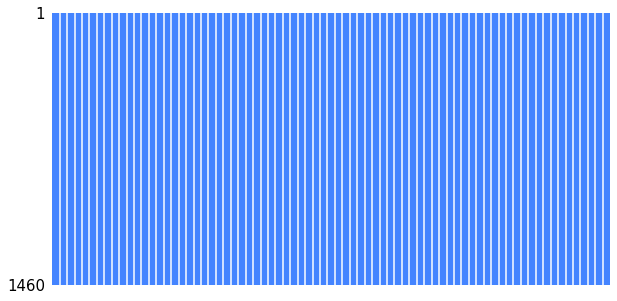

In [18]:
missingno.matrix(housing_df,sparkline=False, figsize=(10,5), fontsize=12, color=(0.27, 0.52, 1.0));

# 3. Problema de Regresión

En primer lugar para las variables categoricas se obtendrán dummies ya que los modelos de arboles y random forest de sklearn no funcionan con variables categóricas. Además también se separarán los dataset de entrenamiento y test.

In [19]:
# Obtener dummies
training_df = pd.get_dummies(housing_df)
#Separar la data en entrenamiento y test
# Variables independientes (se retira el ID y la variable dependiente)
cols = list(training_df.columns[1:len(training_df.columns)-1])
X = training_df[cols].values
# Variable a predecir: precio de la vivienda
Y = training_df['SalePrice']
# Division of dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 3)

#### **Baseline de regresión**
Para poder demostrar que los modelos están aprendiendo de los datos, estos tendrán que superar un baseline determinado por un modelo cuyas predicciones son la media del valor de venta del conjunto de entrenamiento.

In [20]:
baseline_pred = np.zeros((len(Y_test), ))
baseline_pred[:] = np.mean(Y_train)

baseline_rmse = np.sqrt(mean_squared_error(Y_test, baseline_pred))

print(f'RMSE Baseline: {baseline_rmse}')

RMSE Baseline: 70348.66911469729


<b>Árbol de decisión para problema de regresión</b>

En primer lugar analizaremos la cantidad de niveles adecuada para el arbol. Para ello analizaremos el Score obtenido frente a la cantidad de niveles

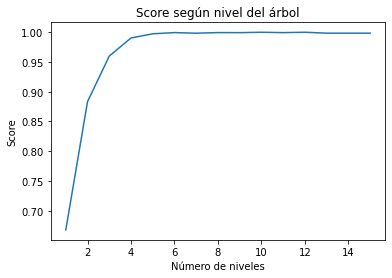

In [21]:
reg_tree = tree.DecisionTreeRegressor(random_state=42)
scores = []
num_variables = len(list(training_df))
n_niveles = range(1, num_variables + 1)
for n in n_niveles:
    reg_tree.set_params(max_depth = n)
    reg_tree.fit(X_train, Y_train)
    scores.append(reg_tree.score(X_test, Y_test))
    
plt.title("Score según nivel del árbol")
plt.xlabel("Número de niveles")
plt.ylabel("Score")
plt.plot(n_niveles[0:15], scores[0:15])
plt.show()

Se observa una convergencia del valor score a partir de 6 niveles, por lo que se elegirá un arbol de profundidad 6. A continuación se entrenará el modelo utilizando esta profundidad:

**Entrenamiento del arbol de decisión**

In [22]:
# Entrenamiento del modelo
reg_tree.set_params(max_depth = 6)
reg_tree.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=6, random_state=42)

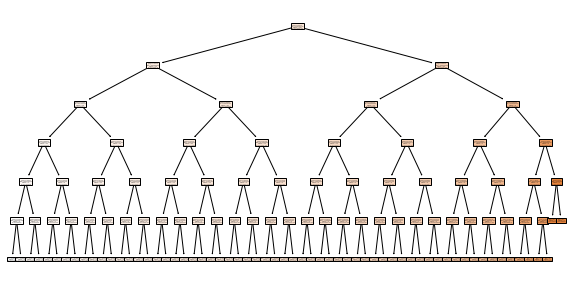

In [48]:
#Graficamente
fig = plt.figure(figsize=(10,5))
_ = tree.plot_tree(reg_tree,filled=True)

A continuación vamos a calcular el error en el conjunto de entrenamiento, para ver como se comporta el modelo en datos que ya ha visto, de esta forma podremos comparar este error con el de test y detectar signos de underfitting u overfitting.

In [23]:
y_train_pred = reg_tree.predict(X_train)
training_rmse = np.sqrt(mean_squared_error(Y_train, y_train_pred))

print(f'Training RMSE: {training_rmse}')

Training RMSE: 1848.9851668651431


A continuación se evaluará el modelo entrenado mediante la utilización del dataset de test y aplicación de metricas

In [24]:
Y_hat =  reg_tree.predict(X_test)

Las metricas elegidas para evaluar el modelo serán el RMSE y el coeficiente de determinación R2:

In [25]:
print("RMSE: {}".format(np.sqrt(mean_squared_error(Y_test, Y_hat))))
print("R2 score: {}".format(r2_score(Y_test, Y_hat)))

RMSE: 1914.856497622138
R2 score: 0.9992574238355422


De estos resultados podemos determinar que el modelo se esta comportando bastante bien. Supera con creces el error del baseline (RMSE de 70269) y además el RMSE del conjunto de test es similar al del conjunto de entrenamiento, por lo que descartamos que exista overfitting. Es un error muy bueno teniendo en cuenta que los precios se mueven en rango de valores muy altos, por lo que también descartamos que exista underfitting.

<b>Random Forest para problema de regresión</b>

En primer lugar analizaremos utilizando diferentes hiperparámetros para ver cuales aportan mejores resultados

In [26]:
# Probar con diferentes valores de hiperparámetros (Se demora algunos minutos)
def obtener_mejor_configuracion(modelo, x, y, num_arboles):
    scores = [[],[],[]]
    errors = [[],[],[]]
    
    for n in num_arboles:
        #Primer caso
        modelo.set_params(n_estimators=n, max_features='auto')
        modelo.fit(x, y)
        scores[0].append(modelo.score(x, y))
        errors[0].append(1 - modelo.oob_score_)
        #Segundo caso
        modelo.set_params(n_estimators=n, max_features=189) # Ojo el p/2 hay que ponerlo manualmente
        modelo.fit(x, y)
        scores[1].append(modelo.score(x, y))
        errors[1].append(1 - modelo.oob_score_)
        #Tercer caso
        modelo.set_params(n_estimators=n, max_features='sqrt')
        modelo.fit(x, y)
        scores[2].append(modelo.score(x, y))
        errors[2].append(1 - modelo.oob_score_)
        
    fig, ax = plt.subplots(1 ,2, figsize=(12, 4))

    ax[0].set_title("Score según el número de árboles")
    ax[0].set_xlabel("Número de árboles")
    ax[0].set_ylabel("score")
    ax[0].plot(num_arboles, scores[0], label='m=p')
    ax[0].plot(num_arboles, scores[1], label='m=p/2')
    ax[0].plot(num_arboles, scores[2], label='m=sqrt(p)')
    ax[0].legend()

    ax[1].set_title("Error OOB según el número de árboles")
    ax[1].set_xlabel("Número de árboles")
    ax[1].set_ylabel("error")
    ax[1].plot(num_arboles, errors[0], label='m=p')
    ax[1].plot(num_arboles, errors[1], label='m=p/2')
    ax[1].plot(num_arboles, errors[2], label='m=sqrt(p)')
    ax[1].legend()
    plt.show()
    
    return scores, errors

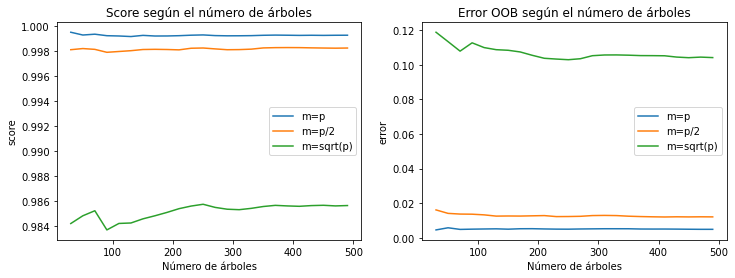

In [27]:
reg_rf = RandomForestRegressor(random_state=42, n_jobs=-1, oob_score=True)
num_arboles = np.arange(30, 500, 20)
scores, errors = obtener_mejor_configuracion(reg_rf, X_train, Y_train, num_arboles)

Puede observarse como el score más alto y el error más bajo se obtiene cuando m=p, es decir cuando trabajamos utilizando todas las columnas del dataframe. Para el número de arboles podemos analizar cuando el score ha sido mayor y el error menor:

In [28]:
# Obtener el número de árboles que obtuvo el mejor score y el menor error OOB
print('Con {} árboles se obtuvo el mayor score'.format((np.argmax(scores[0]) + 3) * 20))
print('Con {} árboles se obtuvo el menor error OOB'.format((np.argmin(errors[0]) + 3) * 20))

Con 60 árboles se obtuvo el mayor score
Con 60 árboles se obtuvo el menor error OOB


Por tanto trabajaremos con m=p y 60 árboles:

**Entrenamiento del Random Forest**

In [29]:
# Entrenamos el modelo
reg_rf.set_params(n_estimators=60, max_features='auto')
reg_rf.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=60, n_jobs=-1, oob_score=True,
                      random_state=42)

De la misma forma que con el Decision Tree, vamos a calcular el error de entrenamiento para estudiar el comportamiento del modelo.

In [30]:
y_train_pred = reg_rf.predict(X_train)
training_rmse = np.sqrt(mean_squared_error(Y_train, y_train_pred))

print(f'Training RMSE: {training_rmse}')

Training RMSE: 2219.3394503221616


A continuación analizaremos el modelo realizando la predicción con el dataset de test y analizando las métricas obtenidas:

In [31]:
Y_hat1 = reg_rf.predict(X_test)

Las metricas elegidas para evaluar el modelo serán el RMSE y el coeficiente de determinación R2:

In [32]:
print("RMSE: {}".format(np.sqrt(mean_squared_error(Y_test, Y_hat1))))
print("R2 score: {}".format(r2_score(Y_test, Y_hat1)))

RMSE: 1061.2171087055465
R2 score: 0.9997719253457065


Podemos observar que de la misma forma que en el Decision Tree, el modelo de Random Forest supera ampliamente el baseline de regresión, por lo que este modelo también captura información de los datos. Si comparamos los errores de training y test, vemos que el error de test es inferior al de training, esto se puede deber a una cierta variabilidad al hacer el split de los datos, ya que, aunque sea de forma aleatoria, puede ocurrir que en el conjunto de test existan instancias sobre las que el modelo tenga mayor capacidad de predicción.

<b> Comentario de los resultados obtenidos por ámbos metodos </b>

De acuerdo a los valores obtenidos de RMSE, el modelo que utiliza Random forest tiene menor error que el que utiliza un árbol. Concretamente se consigue una bajada de **1914**a **1061** al utilizar **Random forest**. Estos resultados tienen sentido puesto que el Random Forest es un ensemble de Decision Trees.

# 4. Problema de Clasificación

En primer lugar establecemos las diferentes categorias de precios de venta,a las cuales se les asignara una etiqueta del 1 al 3:

In [33]:
grupo=[]
for i in training_df.index:
    if training_df.loc[i, 'SalePrice']<= 100000:
        grupo.append(1)
    elif  100001 <= training_df.loc[i, 'SalePrice'] and training_df.loc[i, 'SalePrice'] <= 500000:
        #grupo = grupo2
        grupo.append(2)
    elif  training_df.loc[i, 'SalePrice'] >= 500001:
        grupo.append(3)
    else:
        print(i)
#crear la nueva columna
class_df=training_df
class_df['Grupo']=grupo
# Eliminamos la columna con el precio numérico para evitar overfitting
class_df.drop('SalePrice', axis = 1, inplace = True)
# Mostramos las primeras lineas del dataframe
class_df.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Grupo
0,1,60,8450,7,5,2003,2003,196.0,706,0,...,0,0,1,0,0,0,0,1,0,2
1,2,20,9600,6,8,1976,1976,0.0,978,0,...,0,0,1,0,0,0,0,1,0,2
2,3,60,11250,7,5,2001,2002,162.0,486,0,...,0,0,1,0,0,0,0,1,0,2
3,4,70,9550,7,5,1915,1970,0.0,216,0,...,0,0,1,1,0,0,0,0,0,2
4,5,60,14260,8,5,2000,2000,350.0,655,0,...,0,0,1,0,0,0,0,1,0,2


A continuación procederemos a separar el dataset en los conjunto de entrenamiento y test:

In [34]:
#Separar datos de entrenamiento y test
cols2 = list(class_df.columns[1:len(class_df.columns)-1])
X1= class_df[cols2].values
Y1= class_df['Grupo']
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X1,Y1, test_size=0.2)

#### **Baseline de clasificación**:
De la misma forma que en el problema de regresión, es necesario establecer un baseline para determinar si el modelo está aprendiendo de los datos. En el caso de clasificación, tomaremos como baseline un modelo cuyas predicciones sean todas de la clase mayoritaria.

In [35]:
_, counts = np.unique(Y_train1, return_counts=True)
majority = np.argmax(counts) + 1

baseline_pred = np.zeros((len(Y_test1), ))
baseline_pred[:] = majority

baseline_acc = accuracy_score(Y_test1, baseline_pred)
                     
print(f'Baseline Accuracy: {baseline_acc}')

Baseline Accuracy: 0.8972602739726028


Como vemos el baseline es bastante alto, esto significa que si en vez de utilizar un algoritmo de aprendizaje automático, clasificaramos las instancias como la clase mayoritaria, acertaŕiamos el 92% de las veces. El desbalanceo entre clases es lo que provoca este suceso.

<b> Árbol de decisión para problema de clasificación </b>

Al igual que con el modelo de regresión, analizaremos en primer lugar cual es la profundidad óptima para el árbol:

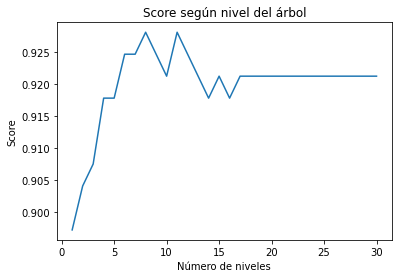

In [36]:
class_tree = tree.DecisionTreeClassifier(random_state=42)
scores = []
num_variables = len(list(class_df))
n_niveles = range(1, num_variables + 1)


for n in n_niveles:
    class_tree.set_params(max_depth = n)
    class_tree.fit(X_train1, Y_train1)
    scores.append(class_tree.score(X_test1, Y_test1))
    
plt.title("Score según nivel del árbol")
plt.xlabel("Número de niveles")
plt.ylabel("Score")
plt.plot(n_niveles[0:30], scores[0:30])
plt.show()

In [37]:
print('Con {} niveles se obtuvo el mayor score'.format(np.argmax(scores)))

Con 7 niveles se obtuvo el mayor score


Por tanto escogeremos una profundidad de <b> 5 </b> para entrenar el árbol

**Entrenamiento del modelo**

In [38]:
# Entrenamiento
class_tree.set_params(max_depth = 7)
class_tree.fit(X_train1, Y_train1)

DecisionTreeClassifier(max_depth=7, random_state=42)

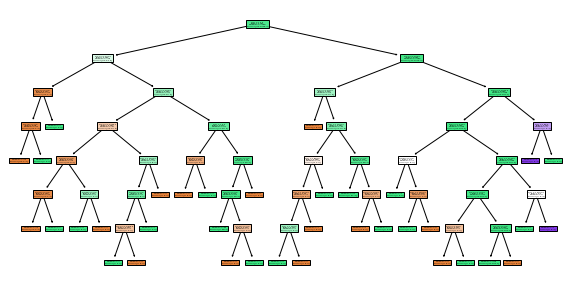

In [49]:
#Graficamente
fig = plt.figure(figsize=(10,5))
_ = tree.plot_tree(class_tree,filled=True)

A continuación vamos a obtener el accuracy en el conjunto de entrenamiento para estudiar el comportamiento del modelo.

In [39]:
training_pred = class_tree.predict(X_train1)
training_acc = accuracy_score(Y_train1, training_pred)
                     
print(f'Training Accuracy: {training_acc}')

Training Accuracy: 0.985445205479452


A continuación se probará el modelo con el dataset de test y se analizarán los resultados utilizando la matriz de confusión y el accuracy:

In [40]:
# Realizamos la predicción
Y_hat2 = class_tree.predict(X_test1)

In [41]:
# Evaluamos la prediccion utilizando las metricas
print("Test Accuracy: {}".format(accuracy_score(Y_test1, Y_hat2)))
print("Matriz de confusión:")
confusion_matrix(Y_test1,Y_hat2)

Test Accuracy: 0.9246575342465754
Matriz de confusión:


array([[ 16,  14,   0],
       [  7, 254,   1],
       [  0,   0,   0]], dtype=int64)

Podemos observar que el modelo en el conjunto de test obtiene peor resultado que el baseline, eso significa que el modelo tiene underfitting, no esta capturando la suficiente información de los datos para superar unas clasificaciones de la clase mayoritaria. Se tendría que mejorar el modelo añadiendo complejidad para poder superar al baseline y así poder estudiar si el modelo también sufre de overfitting.

<b> Random Forest para problema de Clasificación </b>

Al igual que en el caso de regresión, se comprobará que hiperparametros funcionan mejor para entrenar el modelo:

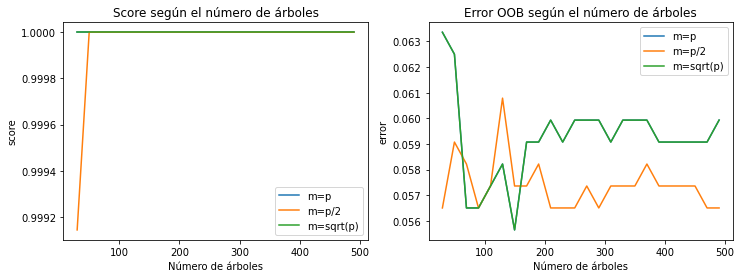

In [42]:
num_arboles = np.arange(30, 500, 20)
class_rf = RandomForestClassifier(random_state=42, n_jobs=-1, oob_score=True)
scores, errors = obtener_mejor_configuracion(class_rf, X_train1, Y_train1, num_arboles)

In [43]:
# Obtener el número de árboles que obtuvo el mejor score y el menor error OOB
print('Con {} árboles se obtuvo el mayor score'.format((np.argmax(scores[1]) + 3) * 20))
print('Con {} árboles se obtuvo el menor error OOB'.format((np.argmin(errors[1]) + 3) * 20))

Con 80 árboles se obtuvo el mayor score
Con 60 árboles se obtuvo el menor error OOB


De acuerdo a las gráficas obtenidas m = p se encuentra solapado con m = sqrt(p). Sin embargo, utilizando m = p/2 se observa como se obtiene un mayor score con menos arboles y un menor error OBB. Por tanto, escogeremos m = p/2 y 80 árboles

In [44]:
# Entrenamos el modelo
class_rf.set_params(n_estimators=80, max_features=189)
class_rf.fit(X_train1, Y_train1)

RandomForestClassifier(max_features=189, n_estimators=80, n_jobs=-1,
                       oob_score=True, random_state=42)

A continuación se obtendrá el accuracy en el conjunto de entrenamiento.

In [45]:
training_pred = class_rf.predict(X_train1)
training_acc = accuracy_score(Y_train1, training_pred)
                     
print(f'Training Accuracy: {training_acc}')

Training Accuracy: 1.0


A continuación se probará el modelo con el dataset de test y se analizarán los resultados utilizando la matriz de confusión y el accuracy:

In [46]:
# Realizamos la predicción
Y_hat3 = class_rf.predict(X_test1)

In [47]:
# Evaluamos la prediccion utilizando las metricas
print("Accuracy: {}".format(accuracy_score(Y_test1, Y_hat3)))
print("Matriz de confusión:")
confusion_matrix(Y_test1,Y_hat3)

Accuracy: 0.9623287671232876
Matriz de confusión:


array([[ 20,  10],
       [  1, 261]], dtype=int64)

En este caso el Random Forest supera el accuracy de baseline, por lo que el modelo esta aprendiendo la suficiente información de los datos. Además, si comparamos los resultados en test y en entrenamiento, vemos que sigue habiendo diferencia, lo que muestra claramente la presencia de overfitting, por lo que habría que regularizar el modelo o reducir su complejidad.

<b> Comentario de los resultados obtenidos por ámbos metodos </b>

De acuerdo a los resultados obtenidos, utilizando el método de árbol de decisión se consigue un accuracy de 0.917 frente a los 0.952 obtenidos por el método de random forest, de ahi que lo escojamos como mejor solución.